In [1]:
import fastbook

In [2]:
fastbook.setup_book()
     

In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)


In [5]:
path

Path('/Users/mike/.fastai/data/mnist_sample')

In [6]:
Path.BASE_PATH = path
Path.BASE_PATH

Path('.')

In [7]:
Path

pathlib.Path

In [8]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [9]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [10]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [11]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [17]:

im3_path = sevens[1]
im3 = Image.open(im3_path)
im3

In [18]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  13,   7,   0,   0,   0,   0,   0,   0

In [19]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,13,7,0,0,0,0,0,0,2,93,244,207,8,0,0,0
7,0,0,0,0,0,0,0,0,0,0,15,157,254,197,0,0,0,0,0,18,131,254,254,248,11,0,0,0
8,0,0,0,0,0,0,0,0,0,9,220,254,254,230,104,0,0,0,65,216,254,254,254,218,8,0,0,0
9,0,0,0,0,0,0,0,0,0,169,254,254,231,126,40,11,70,180,254,254,254,254,254,90,0,0,0,0


In [23]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

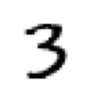

In [24]:
show_image(three_tensors[1]);
     

In [25]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [26]:
len(stacked_threes.shape)


3

In [27]:
stacked_threes.ndim


3

In [28]:

mean3 = stacked_threes.mean(0)
mean3

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04,
         2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 0.0000e+00, 0.0000e+

In [29]:
df = pd.DataFrame(mean3)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,0.000196,0.000234,0.000193,0.000276,0.000262,0.000294,0.000284,0.000157,0.000049,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000016,0.000487,0.000773,0.001447,0.002979,0.005649,0.009518,0.015693,0.021113,0.024280,0.025964,0.024268,0.020875,0.017108,0.011642,0.007044,0.003994,0.001495,0.000329,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000024,0.000033,0.000156,0.001400,0.005785,0.013664,0.030111,0.055401,0.090316,0.137247,0.183566,0.221279,0.246549,0.249719,0.235358,0.198716,0.150844,0.105427,0.064754,0.032829,0.013352,0.004597,0.000393,0.000002,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000058,0.001520,0.008891,0.027837,0.061064,0.112706,0.186884,0.280245,0.382971,0.480244,0.558773,0.613238,0.623291,0.597713,0.528347,0.421000,0.305756,0.203470,0.117423,0.053793,0.016992,0.003462,0.000259,0.000000,0.000000,0.000000
6,0.000000,0.000007,0.000301,0.005817,0.024498,0.059899,0.120376,0.207547,0.319394,0.435468,0.544466,0.627637,0.685036,0.723949,0.744886,0.744625,0.705004,0.608746,0.479163,0.339491,0.213218,0.108683,0.037335,0.007908,0.000823,0.000000,0.000000,0.000000
7,0.000000,0.000324,0.000454,0.009741,0.037895,0.082921,0.153822,0.241572,0.337670,0.426816,0.491613,0.528414,0.544748,0.558829,0.586409,0.627503,0.651254,0.621123,0.528493,0.407527,0.270252,0.144119,0.053465,0.011405,0.001049,0.000000,0.000000,0.000000
8,0.000000,0.000126,0.000540,0.011943,0.040899,0.078775,0.134423,0.194570,0.250744,0.294886,0.316929,0.317466,0.311332,0.321823,0.366340,0.452056,0.537596,0.570680,0.526004,0.417367,0.277697,0.147914,0.056850,0.011186,0.000565,0.000000,0.000000,0.000000
9,0.000000,0.000135,0.000646,0.009146,0.029371,0.054969,0.089482,0.119549,0.141732,0.155846,0.161737,0.161483,0.169577,0.205845,0.292121,0.418709,0.530466,0.574460,0.516988,0.388448,0.243504,0.119844,0.044328,0.008707,0.000116,0.000040,0.000000,0.000000


In [30]:

mean7 = stacked_sevens.mean(0)

In [31]:
df = pd.DataFrame(mean7)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000063,0.000120,0.000084,0.000016,0.000032,0.000040,0.000024,0.000000,0.000230,0.000363,0.000382,0.000337,0.000218,0.000121,0.000001,0.000000,0.000000,0.000000,0.000159,0.000031,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000093,0.000342,0.001185,0.002433,0.004050,0.006239,0.008319,0.008828,0.009521,0.010255,0.009579,0.008793,0.008164,0.006941,0.004937,0.003501,0.001519,0.000690,0.000536,0.000295,0.000001,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000513,0.001144,0.004512,0.012454,0.023687,0.037022,0.054341,0.071389,0.088858,0.099295,0.107212,0.109453,0.110272,0.108771,0.105578,0.096178,0.079079,0.058155,0.037206,0.022864,0.011055,0.003341,0.000456,0.000011,0.000000,0.000000
7,0.000029,0.000424,0.003263,0.010402,0.028360,0.059792,0.104739,0.157012,0.214893,0.272904,0.323979,0.364061,0.392599,0.413188,0.424590,0.433704,0.437562,0.422286,0.375021,0.303385,0.210314,0.121410,0.058161,0.023271,0.004755,0.000730,0.000000,0.000000
8,0.000120,0.001743,0.011414,0.033500,0.070653,0.132629,0.211860,0.311085,0.411384,0.508958,0.591020,0.649767,0.687151,0.704432,0.716644,0.725586,0.730673,0.714450,0.649480,0.527711,0.366640,0.217183,0.105576,0.040372,0.009248,0.001138,0.000000,0.000000
9,0.000183,0.002802,0.018204,0.050405,0.101714,0.179732,0.278085,0.395733,0.510971,0.612353,0.681796,0.718202,0.720315,0.704695,0.697288,0.707309,0.740079,0.768192,0.740349,0.623884,0.436749,0.257098,0.122494,0.042672,0.008554,0.001276,0.000098,0.000128


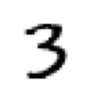

In [33]:

a_3 = stacked_threes[1]
show_image(a_3);